In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
from collections import Counter


In [17]:
def readCsv(fileName):
    fullFileName = r'C:\Users\Owner\McGill\4thYear\COMP551\Assignments\Assignment2\Datasets\DS' + fileName
    df = pd.read_csv(fullFileName, encoding='utf-8', header = None,
                 comment='#', sep=',')
    
    return df

In [18]:
def vote(neighbors):
    classCounter = Counter()
    for neighbor in neighbors:
        classCounter[neighbor[1]]+=1
        
    return classCounter.most_common(1)[0][0]

In [19]:
def kMM(testRow, dfTrain):
    vectorTrainClass = dfTrain.iloc[:,20].as_matrix()
    matrixTrain = dfTrain.iloc[:,0:20].as_matrix()
    vectorTest = testRow[0:20].as_matrix()
    subtractedMatrix = np.subtract(matrixTrain, vectorTest)
    squareMatrix = np.square(subtractedMatrix)
    distances = np.sqrt(np.sum(squareMatrix, axis = 1))
    zipped = list(zip(distances, vectorTrainClass))
    
    return sorted(zipped)

In [20]:
def getNNClass(testRow, k, dfTrain):
    listSorted = kMM(testRow, dfTrain)
    classCounter = vote(listSorted[0:k])
    
    return classCounter

In [21]:
def iterateTestData(dfTrain, dfTest):
    distancesArray = np.zeros((1200, 2800,2))
    
    for i in range(0, len(dfTest)):
        distancesArray[i] = np.asarray(kMM(dfTest.iloc[i, :], dfTrain))
    
    return distancesArray

In [22]:
def predictionsArray(distancesMatrix, k):
    predictions = list()
    for i in range(0, len(distancesMatrix)):
        predictions.append(vote(distancesMatrix[i,0:k]))
    
    return predictions

In [23]:
def testScores(predictionArray, dfTest):
    
    truePositive,trueNegative, falsePositive, falseNegative = np.zeros(4)
    for i in range(0, len(dfTest)):
        if predictionArray[i]==1:
            if dfTest[i]==1:
                truePositive+=1
            elif dfTest[i]==0:
                falsePositive+=1
        elif predictionArray[i]==0:
            if dfTest[i]==1:
                falseNegative+=1
            elif dfTest[i]==0:
                trueNegative+=1

    precision = truePositive/(truePositive+falsePositive)
    recall = truePositive/(truePositive+falseNegative)
    fMeasure = 2*precision*recall/(precision+recall)

    return (precision, recall, fMeasure)

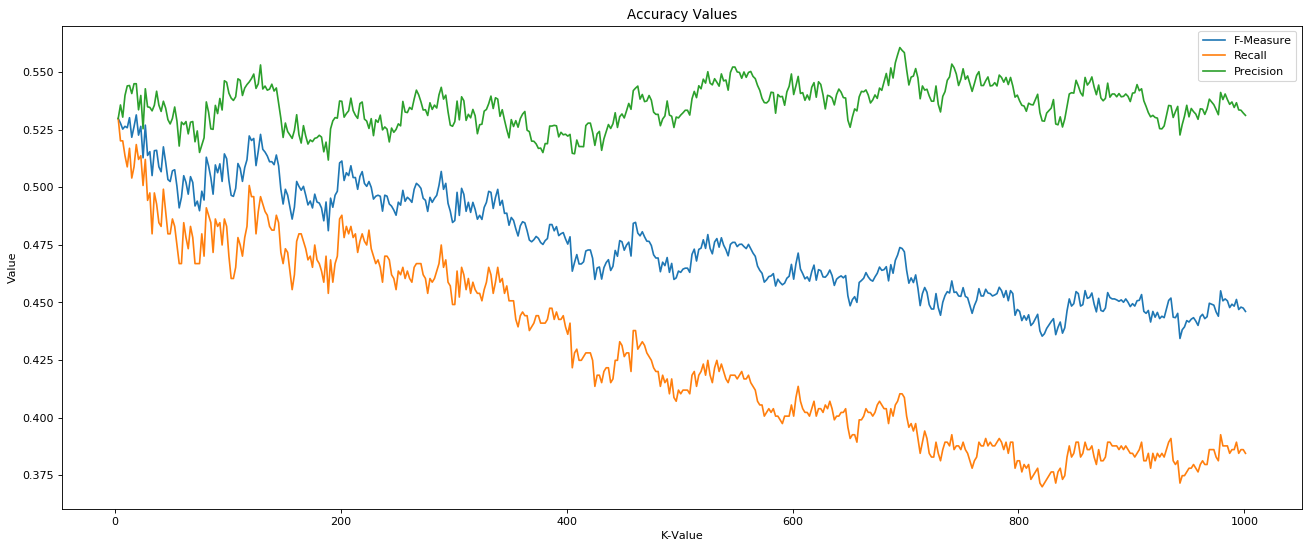

Highest Precision 0.560706401766 at K-value 695.0
Highest Recall 0.529886914378 at K-value 3.0
Highest F-Measure 0.531456953642 at K-value 19.0


In [24]:
def graphFit(dataset):
    if dataset == 1:
        dfTest = readCsv('1_test.csv')
        dfTrain = readCsv('1_train.csv')
    else:
        dfTest = readCsv('2_test.csv')
        dfTrain = readCsv('2_train.csv')
        
    k = np.linspace(3,1001, 500)
    
    distancesMatrix = (iterateTestData(dfTrain, dfTest))
    realClass = dfTest[20].as_matrix()
    
    fMeasure = list()
    precision = list()
    recall = list()
    
    lowestPrecision, lowestRecall, lowestFMeasure = np.zeros(3)
    lowPrecIndex, lowRecIndex, lowFIndex = np.zeros(3)
    for item in k:
        testScore = testScores(predictionsArray(distancesMatrix, int(item)), realClass)
                                
        precision.append(testScore[0])
        recall.append(testScore[1])
        fMeasure.append(testScore[2])
        if (testScore[0]>lowestPrecision):
            lowestPrecision = testScore[0]
            lowPrecIndex = item
        if (testScore[1]>lowestRecall):
            lowestRecall = testScore[1]
            lowRecIndex = item
        if (testScore[2]>lowestFMeasure):
            lowestFMeasure = testScore[2]
            lowFIndex = item
        
        
    plt.figure(figsize=(20,8), dpi=80)
    plt.plot(k, fMeasure, '-', label = 'F-Measure' )
    plt.plot(k, recall, '-', label = 'Recall' )
    plt.plot(k, precision, '-', label = 'Precision' )
    plt.xlabel('K-Value')
    plt.ylabel('Value')
    plt.legend(loc=1)
    plt.title('Accuracy Values')
    plt.show()
    print('Highest Precision', lowestPrecision, 'at K-value', lowPrecIndex)
    print('Highest Recall', lowestRecall, 'at K-value', lowRecIndex)
    print('Highest F-Measure', lowestFMeasure, 'at K-value', lowFIndex)
    
graphFit(2)